In [2]:
import pandas as pd
import numpy as np

In [3]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
train.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [4]:
train.info()
#train['capacity'].str[:-2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1080 non-null   int64  
 1   date       1080 non-null   object 
 2   city       1080 non-null   object 
 3   lat        1072 non-null   float64
 4   long       1067 non-null   float64
 5   pop        1080 non-null   int64  
 6   shop       1080 non-null   object 
 7   brand      1080 non-null   object 
 8   container  1077 non-null   object 
 9   capacity   1076 non-null   object 
 10  price      1080 non-null   float64
 11  quantity   1080 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 101.4+ KB


In [6]:
train['id'].isnull(),train.shape

(0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 7555     True
 7556     True
 7557     True
 7558     True
 7559     True
 Name: id, Length: 7560, dtype: bool,
 (7560, 12))

In [7]:
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
na_Value=pd.isna(train['id'])
train[na_Value]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
6480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train = train.dropna(subset=['id'])

In [10]:
train

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0


In [11]:
train['id']=train['id'].astype(int)
train['date']=train['date'].astype('datetime64[ns]')
train['pop']=train['pop'].astype(int)


def clean_capacity(value):
    if pd.isna(value):
        return np.nan
    elif 'ml' in value:
        return float(value.replace('ml', '').strip()) / 1000
    elif 'lt' in value:
        return float(value.replace('lt', '').strip())
    else:
        return value

train['capacity'] = train['capacity'].apply(clean_capacity)


test['date']=test['date'].astype('datetime64[ns]')
test['capacity'] = test['capacity'].apply(clean_capacity)

<ipython-input-11-f3bf06f7c858>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['date']=train['date'].astype('datetime64[ns]')
<ipython-input-11-f3bf06f7c858>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['date']=test['date'].astype('datetime64[ns]')


In [12]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6480 non-null   int64         
 1   date       6480 non-null   datetime64[ns]
 2   city       6480 non-null   object        
 3   lat        6429 non-null   float64       
 4   long       6434 non-null   float64       
 5   pop        6480 non-null   int64         
 6   shop       6480 non-null   object        
 7   brand      6480 non-null   object        
 8   container  6464 non-null   object        
 9   capacity   6465 non-null   float64       
 10  price      6480 non-null   float64       
 11  quantity   6480 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 916.2+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1080 non-null   int64         
 1   date       1080 non-null   datetime64[ns]
 2   city       1080 non-null   object        
 3   lat        1072 non-null   float64       
 4   long       1067 non-null   float64       
 5   pop        1080 non-null   int64         
 6   shop       1080 non-null   object        
 7   brand      1080 non-null   object        
 8   container  1077 non-null   object        
 9   capacity   1076 non-null   float64       
 10  price      1080 non-null   float64       
 11  quantity   1080 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 101.4+ KB


In [14]:
train.dropna(subset=['id', 'date', 'city', 'lat', 'long', 'pop', 'shop', 'brand','container', 'capacity', 'price', 'quantity'])
test.dropna(subset=['id', 'date', 'city', 'lat', 'long', 'pop', 'shop', 'brand','container', 'capacity', 'price', 'quantity'])
train.shape,test.shape

((6480, 12), (1080, 12))

In [15]:
train.capacity.unique(),train.long.unique(),train.lat.unique(),train.container.unique()

(array([0.5 , 1.5 , 0.33,  nan]),
 array([23.71622, 25.14341, 21.73444, 22.93086, 23.68708, 22.41761,
             nan]),
 array([37.97945, 35.32787, 38.24444, 40.64361, 37.96245, 39.63689,
             nan]),
 array(['glass', 'plastic', 'can', nan], dtype=object))

In [16]:
unique_capacity = train['capacity'].dropna().unique()
unique_long = train['long'].dropna().unique()
unique_lat = train['lat'].dropna().unique()
unique_container = train['container'].dropna().unique()

In [17]:
train_cleaned = train.dropna(how='any')
test_cleaned = test.dropna(how='any')

In [18]:
train_cleaned

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,glass,0.50,0.96,13280.0
1,1,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,plastic,1.50,2.86,6727.0
2,2,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,can,0.33,0.87,9848.0
3,3,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,glass,0.50,1.00,20050.0
4,4,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,can,0.33,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475,2017-12-31,Athens,37.96245,23.68708,665871,shop_3,orange-power,plastic,1.50,1.02,33201.0
6476,6476,2017-12-31,Larisa,39.63689,22.41761,144302,shop_5,orange-power,can,0.33,0.47,46971.0
6477,6477,2017-12-31,Patra,38.24444,21.73444,168501,shop_6,adult-cola,glass,0.50,1.02,47708.0
6478,6478,2017-12-31,Thessaloniki,40.64361,22.93086,353001,shop_4,gazoza,plastic,1.50,1.34,27115.0


## I Losted my <2 of information .
6480-6376=104 removed rows
104/64=1.62 % data

In [19]:
test_cleaned
## 1080 rows to 1058 rows

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.50,3.10,7056
1,6481,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,0.33,0.85,12490
2,6482,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,0.50,0.83,26640
3,6483,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,0.50,0.54,41892
4,6484,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.50,0.83,22923
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,2018-12-31,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.50,2.52,13760
1076,7556,2018-12-31,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.50,2.18,16309
1077,7557,2018-12-31,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,0.33,0.85,24378
1078,7558,2018-12-31,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.50,2.17,20691


In [20]:
train.describe()

,id,date,lat,long,pop,capacity,price,quantity
count,6480.000000,6480,6429.000000,6434.000000,6480.000000,6465.000000,6480.000000,6480.000000
mean,3239.500000,2015-01-14 17:20:00,38.301238,23.270246,355141.416667,0.776950,1.188981,29431.855093
min,0.000000,2012-01-31 00:00:00,35.327870,21.734440,134219.000000,0.330000,0.110000,2953.000000
25%,1619.750000,2013-07-23 06:00:00,37.962450,22.417610,141439.750000,0.330000,0.610000,16441.750000
50%,3239.500000,2015-01-15 12:00:00,38.244440,22.930860,257501.500000,0.500000,0.920000,25184.000000
75%,4859.250000,2016-07-07 18:00:00,39.636890,23.716220,665871.000000,1.500000,1.500000,37866.000000
max,6479.000000,2017-12-31 00:00:00,40.643610,25.143410,672130.000000,1.500000,4.540000,145287.000000
std,1870.759204,NaN,1.649771,1.086960,232828.796289,0.516353,0.814567,17901.328301


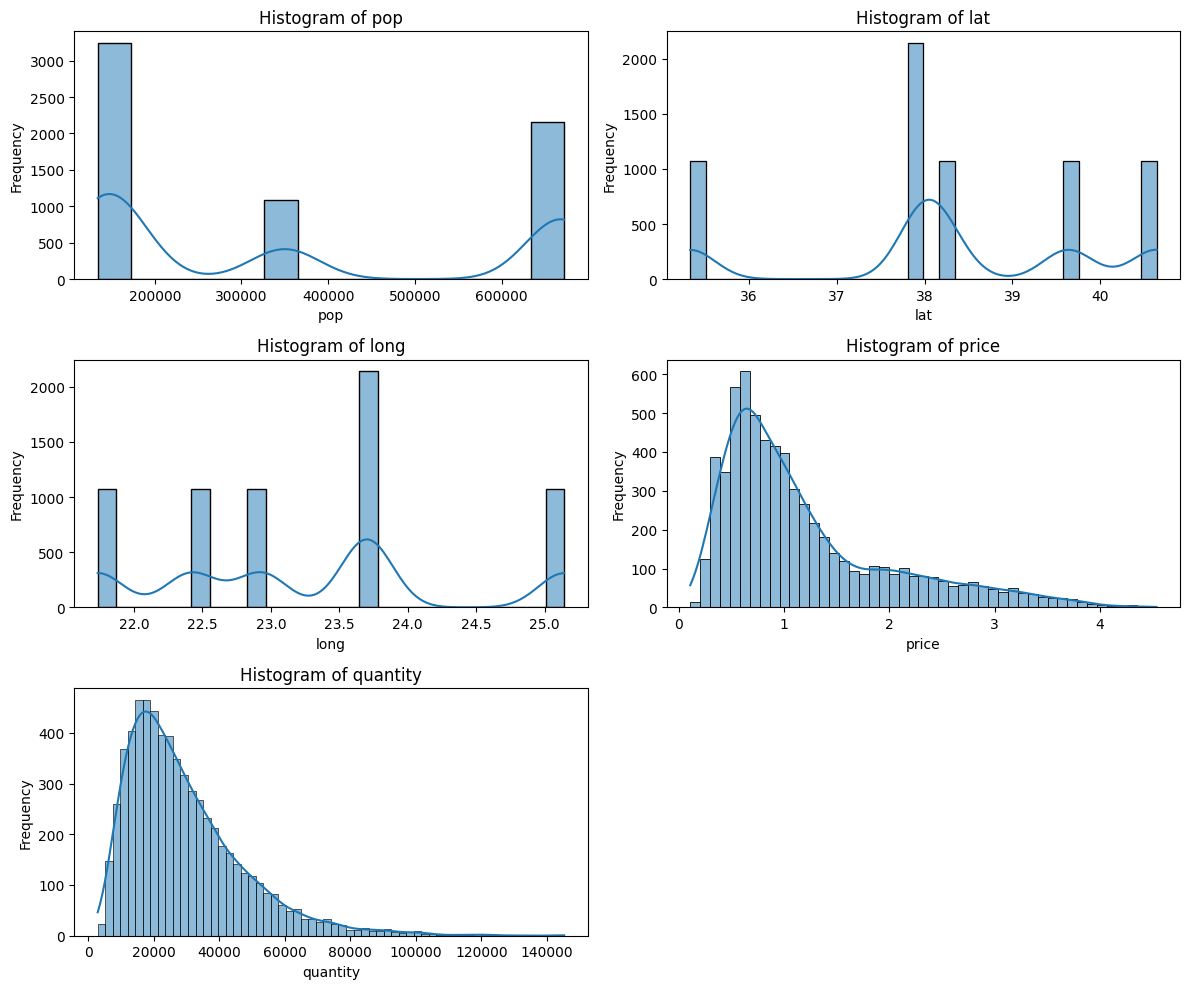

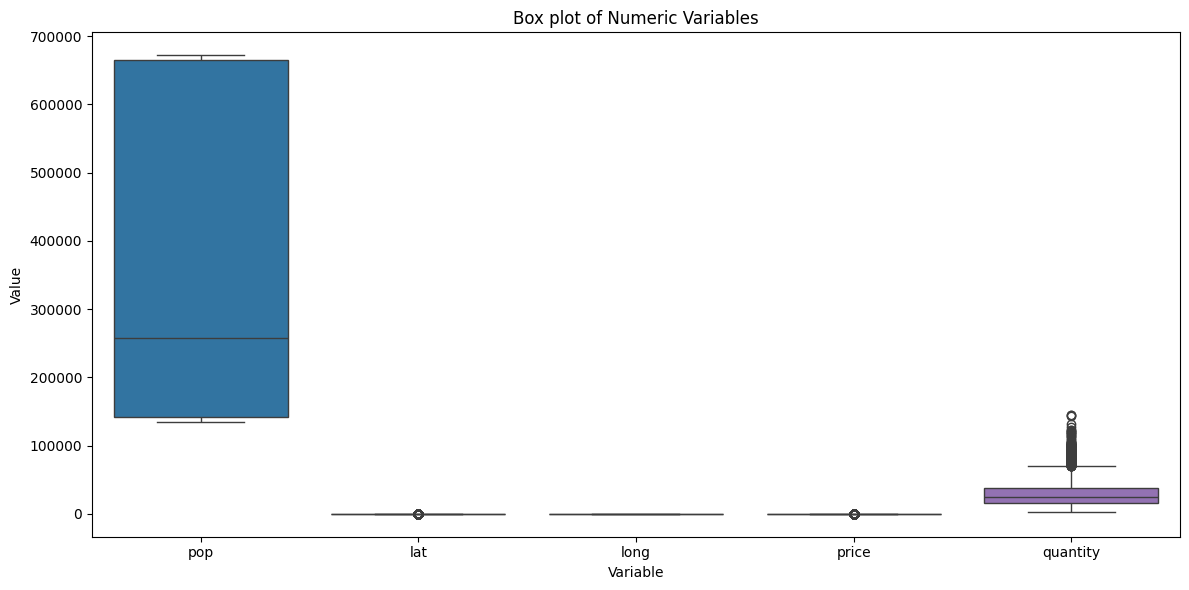

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ['pop', 'lat', 'long', 'price', 'quantity']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(train[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=train[numeric_cols])
plt.title('Box plot of Numeric Variables')
plt.xlabel('Variable')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [22]:
train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day

<ipython-input-22-a68707aab888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['year'] = train_cleaned['date'].dt.year
<ipython-input-22-a68707aab888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['month'] = train_cleaned['date'].dt.month
<ipython-input-22-a68707aab888>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [23]:
#Applying Label Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_cleaned['city_encoded'] = label_encoder.fit_transform(train_cleaned['city'])
train_cleaned['shop_encoded'] = label_encoder.fit_transform(train_cleaned['shop'])
train_cleaned['brand_encoded'] = label_encoder.fit_transform(train_cleaned['brand'])
train_cleaned['container_encoded'] = label_encoder.fit_transform(train_cleaned['container'])

test_cleaned['city_encoded'] = label_encoder.fit_transform(test_cleaned['city'])
test_cleaned['shop_encoded'] = label_encoder.fit_transform(test_cleaned['shop'])
test_cleaned['brand_encoded'] = label_encoder.fit_transform(test_cleaned['brand'])
test_cleaned['container_encoded'] = label_encoder.fit_transform(test_cleaned['container'])




<ipython-input-23-3dfdd5a2089f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['city_encoded'] = label_encoder.fit_transform(train_cleaned['city'])
<ipython-input-23-3dfdd5a2089f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['shop_encoded'] = label_encoder.fit_transform(train_cleaned['shop'])
<ipython-input-23-3dfdd5a2089f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [24]:
from sklearn.preprocessing import MinMaxScaler

# Columns to be scaled
numeric_cols = ['pop', 'price', 'quantity','capacity']
scaler = MinMaxScaler()
scaler.fit(train_cleaned[numeric_cols])

train_cleaned[numeric_cols] = scaler.transform(train_cleaned[numeric_cols])
test_cleaned[numeric_cols] = scaler.transform(test_cleaned[numeric_cols])
print(train_cleaned.head())


   id       date    city       lat      long  pop    shop        brand  \
0   0 2012-01-31  Athens  37.97945  23.71622  1.0  shop_1  kinder-cola   
1   1 2012-01-31  Athens  37.97945  23.71622  1.0  shop_1  kinder-cola   
2   2 2012-01-31  Athens  37.97945  23.71622  1.0  shop_1  kinder-cola   
3   3 2012-01-31  Athens  37.97945  23.71622  1.0  shop_1   adult-cola   
4   4 2012-01-31  Athens  37.97945  23.71622  1.0  shop_1   adult-cola   

  container  capacity     price  quantity  year  month  day  city_encoded  \
0     glass  0.145299  0.191874  0.072555  2012      1   31             0   
1   plastic  1.000000  0.620767  0.026515  2012      1   31             0   
2       can  0.000000  0.171558  0.048442  2012      1   31             0   
3     glass  0.145299  0.200903  0.120119  2012      1   31             0   
4       can  0.000000  0.063205  0.159786  2012      1   31             0   

   shop_encoded  brand_encoded  container_encoded  
0             0              2          

<ipython-input-24-b1d166f8aa24>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[numeric_cols] = scaler.transform(train_cleaned[numeric_cols])
<ipython-input-24-b1d166f8aa24>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned[numeric_cols] = scaler.transform(test_cleaned[numeric_cols])


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_cleaned[numeric_cols])

train_cleaned[numeric_cols] = scaler.transform(train_cleaned[numeric_cols])
test_cleaned[numeric_cols] = scaler.transform(test_cleaned[numeric_cols])

print(train_cleaned.head())


   id       date    city       lat      long       pop    shop        brand  \
0   0 2012-01-31  Athens  37.97945  23.71622  1.362911  shop_1  kinder-cola   
1   1 2012-01-31  Athens  37.97945  23.71622  1.362911  shop_1  kinder-cola   
2   2 2012-01-31  Athens  37.97945  23.71622  1.362911  shop_1  kinder-cola   
3   3 2012-01-31  Athens  37.97945  23.71622  1.362911  shop_1   adult-cola   
4   4 2012-01-31  Athens  37.97945  23.71622  1.362911  shop_1   adult-cola   

  container  capacity     price  quantity  year  month  day  city_encoded  \
0     glass -0.535954 -0.282097 -0.901990  2012      1   31             0   
1   plastic  1.401534  2.046206 -1.268287  2012      1   31             0   
2       can -0.865327 -0.392385 -1.093831  2012      1   31             0   
3     glass -0.535954 -0.233080 -0.523564  2012      1   31             0   
4       can -0.865327 -0.980588 -0.207966  2012      1   31             0   

   shop_encoded  brand_encoded  container_encoded  
0         

<ipython-input-25-a007f8d249eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[numeric_cols] = scaler.transform(train_cleaned[numeric_cols])
<ipython-input-25-a007f8d249eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned[numeric_cols] = scaler.transform(test_cleaned[numeric_cols])


In [26]:
train_cleaned.columns

Index(['id', 'date', 'city', 'lat', 'long', 'pop', 'shop', 'brand',
       'container', 'capacity', 'price', 'quantity', 'year', 'month', 'day',
       'city_encoded', 'shop_encoded', 'brand_encoded', 'container_encoded'],
      dtype='object')

In [27]:
X= train_cleaned[['lat', 'long', 'pop', 'shop_encoded', 'brand_encoded', 'container_encoded', 'capacity', 'price', 'year', 'month', 'day']]
y = train_cleaned['quantity']  # or y = train['price']

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import numpy as np

# Define the parameter grids for both models
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the models
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Custom scorer for GridSearchCV
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=tscv, scoring=rmse_scorer)
rf_grid_search.fit(X, y)
best_rf_model = rf_grid_search.best_estimator_

# GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=tscv, scoring=rmse_scorer)
gb_grid_search.fit(X, y)
best_gb_model = gb_grid_search.best_estimator_

# Define cross-validation function
def rolling_window_cross_validation(model, X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    mse_scores = []
    rmse_scores = []
    r2_scores = []
    for train_index, val_index in tscv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = model.score(X_val, y_val)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(r2_scores)

# Evaluate best models
rf_mse, rf_rmse, rf_r2 = rolling_window_cross_validation(best_rf_model, X, y)
gb_mse, gb_rmse, gb_r2 = rolling_window_cross_validation(best_gb_model, X, y)

# Print evaluation results
print(f"Best Random Forest - Average MSE: {rf_mse}, Average RMSE: {rf_rmse}, Average R²: {rf_r2}")
print(f"Best Gradient Boosting - Average MSE: {gb_mse}, Average RMSE: {gb_rmse}, Average R²: {gb_r2}")


Best Random Forest - Average MSE: 0.08091494485252461, Average RMSE: 0.28278169014095655, Average R²: 0.9138183420174292
Best Gradient Boosting - Average MSE: 0.04587211212539665, Average RMSE: 0.2115249734900388, Average R²: 0.9516315722885856
